In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('combined_rainfall_data2.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")

df.fillna(0, inplace=True)





In [3]:
df.head()

,date,lat,lon,rainfall
0,1986-01-01,19.125,72.625,0.0
1,1986-01-01,19.125,72.875,0.0
2,1986-01-01,19.375,72.625,0.0
3,1986-01-01,19.375,72.875,0.0
4,1986-01-02,19.125,72.625,0.0


In [4]:
# Convert datetime to Unix timestamp
df['date'] = df['date'].astype('int64') / 10**9

# Now you can apply MinMaxScaler to the entire DataFrame
sc = MinMaxScaler()
scaled_data = sc.fit_transform(df)

In [5]:
import numpy as np

backcandles = 10
n_features = scaled_data.shape[1] - 1  # Assuming the last column is the target

# Create the input sequences (X)
X = np.array([scaled_data[i-backcandles:i, :n_features] for i in range(backcandles, len(scaled_data))])

# Create the target values (y)
y = scaled_data[backcandles:, -1]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (51126, 10, 3)
y shape: (51126,)


In [6]:
print(scaled_data[1-backcandles:1,1])

[]


In [7]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train,X_test = X[:splitlimit],X[splitlimit:]
y_train,y_test = y[:splitlimit],y[splitlimit:]

40900


In [8]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,TimeDistributed

In [9]:

import tensorflow as tf
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Input,Activation,concatenate


In [10]:
# Determine the number of features in your data
n_features = X_train.shape[2]

# Modify the model definition
lstm_input = Input(shape=(backcandles, n_features), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)

# Compile and fit the model
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=True)

Epoch 1/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0099
Epoch 2/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.0496e-04
Epoch 3/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 1.1187e-04
Epoch 4/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 9.1416e-06
Epoch 5/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.3378e-05
Epoch 6/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 1.0144e-05
Epoch 7/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.1326e-05
Epoch 8/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 2.3784e-08
Epoch 9/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 1.6593e-04
Epoch 10/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 2.4095e-05


In [11]:
y_pred = model.predict(X_test)

320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


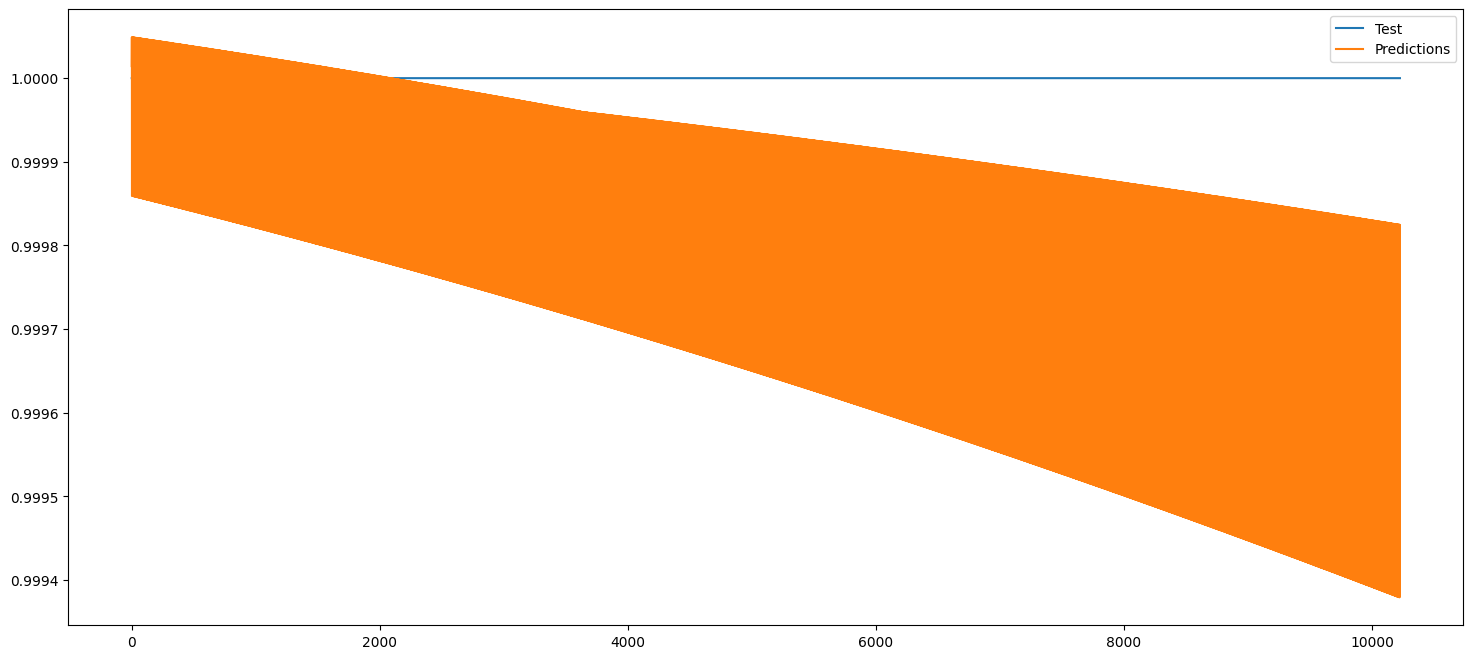

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(y_test,label='Test')
plt.plot(y_pred,label = 'Predictions')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

0.00016477945357788433

In [14]:
y_pred


array([[1.0000144 ],
       [1.0000489 ],
       [0.99985933],
       ...,
       [0.9998247 ],
       [0.99971414],
       [0.9997474 ]], dtype=float32)

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import datetime

# Load your data into a DataFrame (assuming df is already defined)
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line if needed

# Convert the 'date' column to Unix timestamp
df['timestamp'] = pd.to_datetime(df['date']).apply(lambda x: x.timestamp())

# Select the features for scaling
features = df[['timestamp', 'lat', 'lon', 'rainfall']]

# Step 1: Fit the MinMaxScaler with the data
sc = MinMaxScaler()
sc.fit(features)

# Example specific date and location
specific_date = '2023-10-01'
lat = 19.125
lon = 72.625

# Step 2: Convert the specific date to Unix timestamp
unix_timestamp = int(pd.to_datetime(specific_date).timestamp())

# Step 3: Create a feature array including lat, lon, timestamp, and a placeholder for rainfall
input_features = np.array([[unix_timestamp, lat, lon, 0]])  # Placeholder for rainfall

# Step 4: Scale the feature array using the fitted MinMaxScaler
scaled_features = sc.transform(input_features)

# Step 5: Ensure the scaled features have the correct shape
scaled_features = scaled_features.reshape(1,-1)  # Reshape to (1, 4)

# Step 6: Use the trained model to make a prediction
# Assuming the model is named 'model'
prediction = model.predict(scaled_features)

print(f"Prediction for {specific_date} at lat {lat}, lon {lon}: {prediction}")

d:\FloodAihackthon\.venvv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: as_list() is not defined on an unknown TensorShape.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Convert the 'date' column to Unix timestamp
df['timestamp'] = pd.to_datetime(df['date']).apply(lambda x: x.timestamp())

# Select the features for scaling
features = df[['timestamp', 'lat', 'lon', 'rainfall']]

# Step 1: Fit the MinMaxScaler with the data
sc = MinMaxScaler()
sc.fit(features)

# Example specific date and location
specific_date = '2023-10-01'
lat = 19.125
lon = 72.625

# Step 2: Convert the specific date to Unix timestamp
unix_timestamp = int(pd.to_datetime(specific_date).timestamp())

# Step 3: Create a feature array including lat, lon, timestamp, and a placeholder for rainfall
input_features = np.array([[unix_timestamp, lat, lon, 0]])  # Placeholder for rainfall

# Step 4: Scale the feature array using the fitted MinMaxScaler
scaled_features = sc.transform(input_features)

# Step 5: Ensure the scaled features have the correct shape for the LSTM model
# Reshape to (1, backcandles, n_features)
backcandles = 10  # Same backcandles as used during model training
scaled_features = np.repeat(scaled_features, backcandles, axis=0).reshape(1, backcandles, -1)

# Step 6: Use the trained model to make a prediction
prediction = model.predict(scaled_features)

print(f"Prediction for {specific_date} at lat {lat}, lon {lon}: {prediction}")


NameError: name 'df' is not defined